# Problem

$ \sum 1 $

By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.

    3
    7 4
    2 4 6
    8 5 9 3

That is, 3 + 7 + 4 + 9 = 23.

Find the maximum total from top to bottom of the triangle below:

    75
    95 64
    17 47 82
    18 35 87 10
    20 04 82 47 65
    19 01 23 75 03 34
    88 02 77 73 07 63 67
    99 65 04 28 06 16 70 92
    41 41 26 56 83 40 80 70 33
    41 48 72 33 47 32 37 16 94 29
    53 71 44 65 25 43 91 52 97 51 14
    70 11 33 28 77 73 17 78 39 68 17 57
    91 71 52 38 17 14 91 43 58 50 27 29 48
    63 66 04 68 89 53 67 30 73 16 69 87 40 31
    04 62 98 27 23 09 70 98 73 93 38 53 60 04 23

NOTE: As there are only 16384 routes, it is possible to solve this problem by trying every route. However, Problem 67, is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)

# Data

First we want to read in the data, and parse it into a list of numbers.

In [1]:
raw <- '75 95 64 17 47 82 18 35 87 10 20 04 82 47 65 19 01
 23 75 03 34 88 02 77 73 07 63 67 99 65 04 28 06 16 70 92
 41 41 26 56 83 40 80 70 33 41 48 72 33 47 32 37 16 94 29
 53 71 44 65 25 43 91 52 97 51 14 70 11 33 28 77 73 17 78
 39 68 17 57 91 71 52 38 17 14 91 43 58 50 27 29 48 63 66
 04 68 89 53 67 30 73 16 69 87 40 31 04 62 98 27 23 09 70
 98 73 93 38 53 60 04 23'

data <- c(lapply(strsplit(raw, ' '), as.numeric)[[1]])
data

[1] 75 95 64 17 47 82 18 35 87 10 20  4 82 47 65 19  1 23 75  3 34 88  2 77 73
 [26]  7 63 67 99 65  4 28  6 16 70 92 41 41 26 56 83 40 80 70 33 41 48 72 33 47
 [51] 32 37 16 94 29 53 71 44 65 25 43 91 52 97 51 14 70 11 33 28 77 73 17 78 39
 [76] 68 17 57 91 71 52 38 17 14 91 43 58 50 27 29 48 63 66  4 68 89 53 67 30 73
[101] 16 69 87 40 31  4 62 98 27 23  9 70 98 73 93 38 53 60  4 23

In [2]:
length(data)

[1] 120

# Data Structure

We want to create a few functions that:

 * Return the row number for any given index.
 * Return the child indices for any given index.
 * Find the value in the data for any given index.
 * Return the indices for any given value.

We want to create a function `in.row(x)` that finds the row number for any given index:

In [437]:
in.row <- function(x) {
    row <- 0
    current <- 0
    while(current < x) {
        row = row + 1
        current = current + row
    }
    (row)
}

In [438]:
in.row(3)

[1] 2

For any given index, we want to a function `find.children(index)` that finds the child indices.

In [439]:
find.children <- function(index) {
    row.size = in.row(index)
    c(index+row.size, index+row.size+1)
}

In [440]:
find.children(5)

[1] 8 9

For any given index, we want create a function `find.value(x)` that finds the value.

In [441]:
find.value <- function(x) data[x]

For any given value, we want create a function `find.index(x)` that finds the indices.

In [442]:
find.index <- function(x) which(x == data)

In [443]:
find.index(82)

[1]  6 13

In [444]:
lapply(find.index(82), find.value)

[[1]]
[1] 82

[[2]]
[1] 82

## Triangle sequence to matrix

We want to create a function `triangle.as.matrix(sequence)` that creates a $N\times N$ matrix from the sequence of values.

In [458]:
triangle.as.matrix <- function(seq, N) {
    M = matrix(, ncol=N, nrow=N)
    row = 1
    column = 1
    row.max = 1
    for (i in 1:length(seq)) {
        # If we are at the end of the row, move to the next one.
        # For every row, it increases the row size by 1.
        if(i > row.max) {
            row.max = row.max+row+1
            row = in.row(i)
            column = 1
        }
        M[row, column] = seq[i]
        column = column+1
    }
    dimnames(M) <- list(rownames(M, do.NULL = FALSE, prefix='r'),
                          colnames(M, do.NULL = FALSE, prefix='c'))
    (M)
}

In [459]:
M = triangle.as.matrix(data, 15)
M

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
r1,75,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r2,95,64,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r3,17,47,82,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r4,18,35,87,10,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r5,20,4,82,47,65,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r6,19,1,23,75,3,34,NA,NA,NA,NA,NA,NA,NA,NA,NA
r7,88,2,77,73,7,63,67,NA,NA,NA,NA,NA,NA,NA,NA
r8,99,65,4,28,6,16,70,92,NA,NA,NA,NA,NA,NA,NA
r9,41,41,26,56,83,40,80,70,33,NA,NA,NA,NA,NA,NA
r10,41,48,72,33,47,32,37,16,94,29,NA,NA,NA,NA,NA


## Heatmap of $M$

If plot the matrix as a heatmap, we can easily see how the values are distributed in the triangle from low to high.

In [460]:
library(gplots)

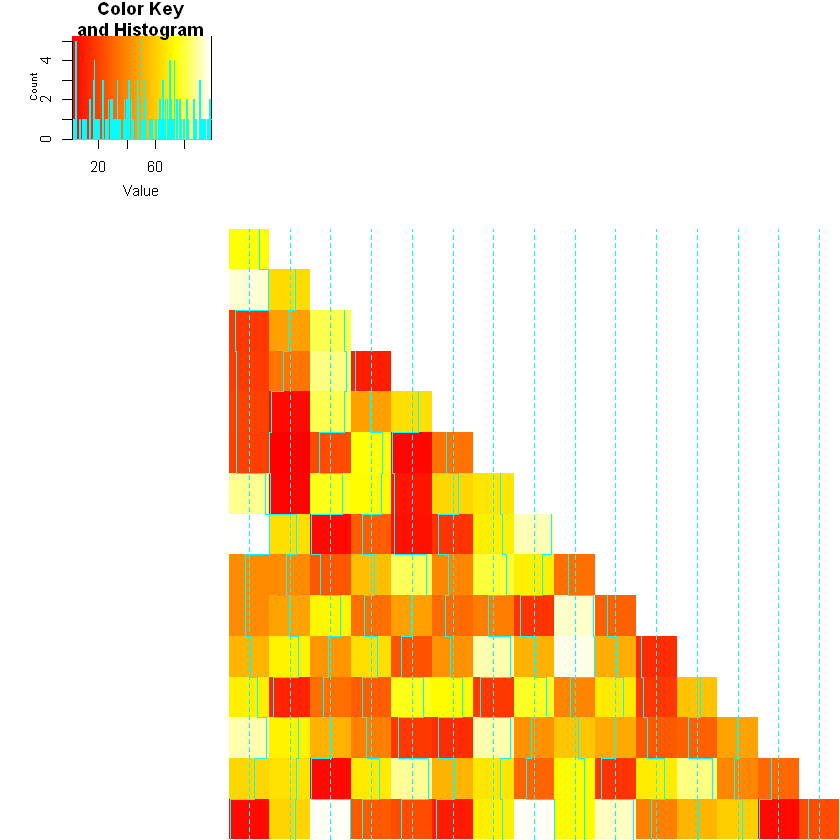

In [461]:
heatmap.2(M, Rowv=NA, Colv=NA, col = heat.colors(256),  margins=c(0,0)
          , dendrogram='none')

# Brute force algorithm

We want to find the total value of a path with a function `find.path.value(vec)` where we give a list of indices, and the sum of the values is returned.

In [449]:
find.path.value <- function(path, data) Reduce('+', find.value(path))

In [450]:
find.path.value(c(1,2))

[1] 170

Next we create all the possible paths. We only have to save paths that are from top to bottom.

In [451]:
N = 15
frontier = vector("list", N)
next_frontier = vector("list", N)
frontier[[1]] = c(1)
index = 1
row = 1

while(row < N) {    
    next_frontier = vector("list", N)
    for (path in Filter(Negate(is.null), frontier))
    for (child in find.children(tail(path, n=1))) {
        next_frontier[[index]] = c(path,child)
        index=index+1
    }
    frontier = next_frontier
    index=1
    row=row+1
}

Finally we find the highest path in the frontier to find the answer.

In [452]:
max = 0
for (p in frontier) {
    path.value = find.path.value(p)
    if(path.value > max) max = path.value
}
max

[1] 1074

# A better way

It is much easier to start at the bottom of the tree. We create a cumulated triangle from the bottom to the top, and we cumulate with the child node that has the highest value.

Starting at the first element in the second last row, we find the child values for those, and add the largest child to the current element. Repeating this for each element while traversing up the triangle, gives us the answer in the top of the triangle.

We can do this with the following pseudocode:

    For row in 14:1:
        For column in row:
            M[row,column] += max(M[row+1,column], M[row+1, column+1])

In [453]:
M = triangle.as.matrix(data, 15)
M

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
r1,75,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r2,95,64,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r3,17,47,82,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r4,18,35,87,10,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r5,20,4,82,47,65,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r6,19,1,23,75,3,34,NA,NA,NA,NA,NA,NA,NA,NA,NA
r7,88,2,77,73,7,63,67,NA,NA,NA,NA,NA,NA,NA,NA
r8,99,65,4,28,6,16,70,92,NA,NA,NA,NA,NA,NA,NA
r9,41,41,26,56,83,40,80,70,33,NA,NA,NA,NA,NA,NA
r10,41,48,72,33,47,32,37,16,94,29,NA,NA,NA,NA,NA


In [454]:
for(row.current in 14:1) 
for (i in 1:row.current) 
    M[row.current, i] = M[row.current, i] + max(M[row.current+1, i], M[row.current+1, i+1])

M

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
r1,1074,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r2,995,999,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r3,818,900,935,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r4,704,801,853,792,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r5,686,640,766,731,782,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
r6,666,614,636,684,660,717,NA,NA,NA,NA,NA,NA,NA,NA,NA
r7,647,501,613,609,533,657,683,NA,NA,NA,NA,NA,NA,NA,NA
r8,559,499,479,536,514,526,594,616,NA,NA,NA,NA,NA,NA,NA
r9,460,434,419,475,508,470,510,524,487,NA,NA,NA,NA,NA,NA
r10,419,365,393,387,419,425,430,376,454,322,NA,NA,NA,NA,NA


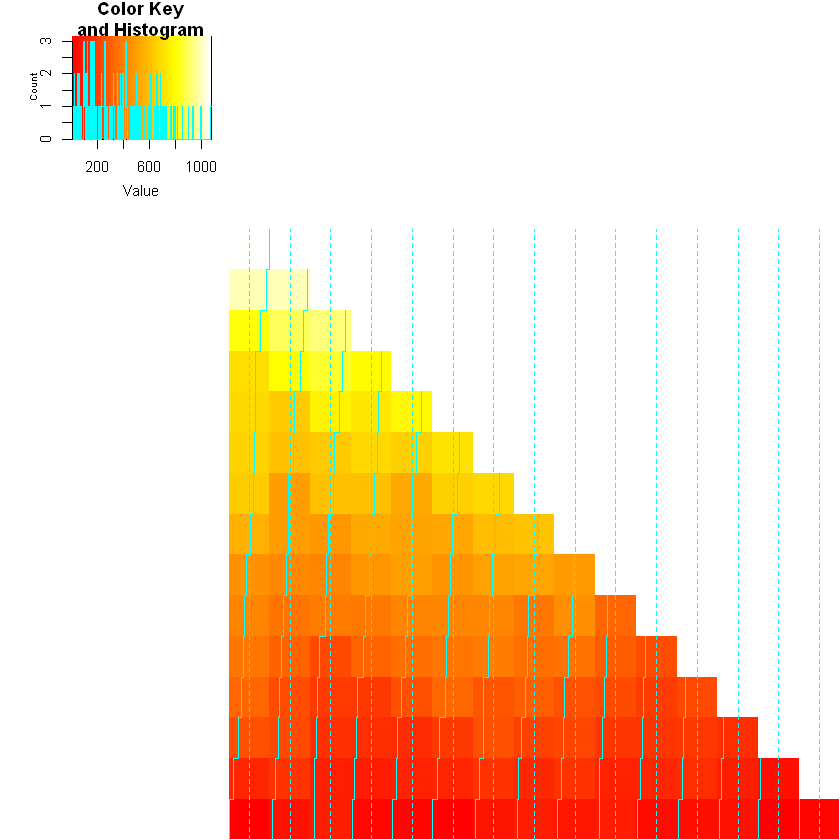

In [455]:
heatmap.2(M, Rowv=NA, Colv=NA, col = heat.colors(256),  margins=c(0,0)
          , dendrogram='none')

And the answer is:

In [456]:
M[1,1]

[1] 1074

# Code

This is the finished implementation to find the answer.

In [457]:
raw <- '75 95 64 17 47 82 18 35 87 10 20 04 82 47 65 19 01
 23 75 03 34 88 02 77 73 07 63 67 99 65 04 28 06 16 70 92
 41 41 26 56 83 40 80 70 33 41 48 72 33 47 32 37 16 94 29
 53 71 44 65 25 43 91 52 97 51 14 70 11 33 28 77 73 17 78
 39 68 17 57 91 71 52 38 17 14 91 43 58 50 27 29 48 63 66
 04 68 89 53 67 30 73 16 69 87 40 31 04 62 98 27 23 09 70
 98 73 93 38 53 60 04 23'

data <- c(lapply(strsplit(raw, ' '), as.numeric)[[1]])

in.row <- function(x) {
    row <- 0
    current <- 0
    while(current < x) {
        row = row + 1
        current = current + row
    }
    row
}

triangle.as.matrix <- function(seq, N) {
    M = matrix(, ncol=N, nrow=N)
    row = 1
    column = 1
    row.max = 1
    for (i in 1:length(seq)) {
        if(i > row.max) {
            row.max = row.max+row+1
            row = in.row(i)
            column = 1
        }
        M[row, column] = seq[i]
        column = column+1
    }
    M
}

M = triangle.as.matrix(data, 15)

for(row in 14:1) 
for (column in 1:row) 
    M[row, column] = M[row, column] + max(M[row+1, column], M[row+1, column+1])
    
M[1,1]

[1] 1074